In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import keras
%matplotlib inline
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [13]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [14]:
xtrain.shape

(60000, 28, 28)

In [15]:
ytrain.shape

(60000,)

In [16]:
xtest.shape

(10000, 28, 28)

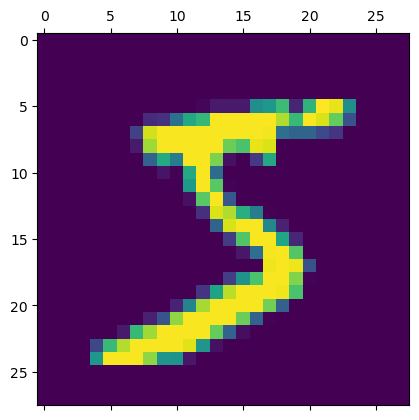

In [17]:
plt.matshow(xtrain[0])

In [18]:
xtrain=xtrain/255
xtest=xtest/255

In [19]:
X_train_flattend=xtrain.reshape(len(xtrain),28*28)
X_test_flattend=xtest.reshape(len(xtest),28*28)

In [20]:
X_train_flattend.shape

(60000, 784)

In [21]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),
                      activation='sigmoid')
])
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(X_train_flattend,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 691us/step - loss: 0.4668 - accuracy: 0.8793
Epoch 2/5
1875/1875 [==============================] - 1s 702us/step - loss: 0.3039 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 1s 660us/step - loss: 0.2832 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 1s 727us/step - loss: 0.2733 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 1s 663us/step - loss: 0.2666 - accuracy: 0.9254


In [22]:
model.evaluate(X_test_flattend,ytest)

313/313 [==============================] - 0s 569us/step - loss: 0.2682 - accuracy: 0.9263


[0.26815593242645264, 0.9262999892234802]

In [24]:
y_pred=model.predict(X_test_flattend)

In [28]:
len(y_pred)

10000

In [29]:
y_pred[0]

array([2.9345542e-02, 5.8455214e-07, 4.8617870e-02, 9.5363170e-01,
       3.7236810e-03, 1.4384499e-01, 1.9111551e-06, 9.9983561e-01,
       1.3034382e-01, 7.0403838e-01], dtype=float32)

In [30]:
ytest[0]

7

In [31]:
np.argmax(y_pred[0])

7

In [32]:
from sklearn.metrics import confusion_matrix,classification_report

In [35]:
y_predicted=[np.argmax(i) for i in y_pred]

In [39]:
cm=confusion_matrix(ytest,y_predicted)

In [40]:
print(classification_report(ytest,y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.94      0.88      0.91      1032
           3       0.93      0.90      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.90      0.88      0.89       892
           6       0.94      0.95      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.87      0.90      0.89       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



<AxesSubplot:>

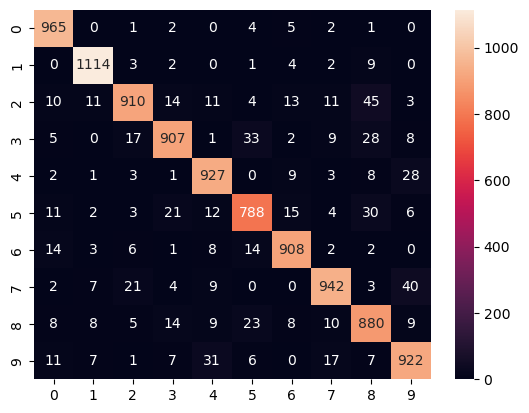

In [43]:
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')

In [44]:
#Hidden layers

In [46]:
model=keras.Sequential([
    
    keras.layers.Dense(100,input_shape=(784,),activation='sigmoid'),
     keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(X_train_flattend,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 923us/step - loss: 0.4168 - accuracy: 0.8945
Epoch 2/5
1875/1875 [==============================] - 2s 852us/step - loss: 0.2003 - accuracy: 0.9428
Epoch 3/5
1875/1875 [==============================] - 2s 865us/step - loss: 0.1492 - accuracy: 0.9574
Epoch 4/5
1875/1875 [==============================] - 2s 927us/step - loss: 0.1173 - accuracy: 0.9669
Epoch 5/5
1875/1875 [==============================] - 2s 837us/step - loss: 0.0956 - accuracy: 0.9727


In [47]:
model.evaluate(X_test_flattend,ytest)

313/313 [==============================] - 0s 653us/step - loss: 0.1027 - accuracy: 0.9683


[0.1026749387383461, 0.9682999849319458]

In [51]:
model=keras.Sequential([
    
    keras.layers.Dense(150,input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(50,activation='sigmoid'),
    keras.layers.Dense(40,activation='sigmoid'),
    keras.layers.Dense(30,activation='sigmoid'),
     keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(X_train_flattend,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8438 - accuracy: 0.7747
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2147 - accuracy: 0.9446
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1389 - accuracy: 0.9622
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1039 - accuracy: 0.9711
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0810 - accuracy: 0.9776
